In [135]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

import os
import cv2
from tqdm import tqdm

import skimage.io
from skimage import img_as_uint
import shutil

## External H&E Data with Mask Annotations
 

In [129]:
data_path = '../data/external/HandE/'
train_ids = [x for x in os.listdir(data_path) if os.path.isdir(data_path + x)]

In [158]:
df = pd.DataFrame({'id' : train_ids,'train_or_test':'train'})
df['path'] = df.apply(lambda x : data_path +'/{}/images/{}.tif'.format(x[0],x[0]), axis=1)
df['masks'] = df.apply(lambda x : data_path +'/{}/masks/'.format(x[0],x[0]), axis=1)
df.head()

,id,train_or_test,path,masks
0,TCGA-18-5592-01Z-00-DX1,train,../data/external/HandE//TCGA-18-5592-01Z-00-DX...,../data/external/HandE//TCGA-18-5592-01Z-00-DX...
1,TCGA-21-5784-01Z-00-DX1,train,../data/external/HandE//TCGA-21-5784-01Z-00-DX...,../data/external/HandE//TCGA-21-5784-01Z-00-DX...
2,TCGA-21-5786-01Z-00-DX1,train,../data/external/HandE//TCGA-21-5786-01Z-00-DX...,../data/external/HandE//TCGA-21-5786-01Z-00-DX...
3,TCGA-38-6178-01Z-00-DX1,train,../data/external/HandE//TCGA-38-6178-01Z-00-DX...,../data/external/HandE//TCGA-38-6178-01Z-00-DX...
4,TCGA-49-4488-01Z-00-DX1,train,../data/external/HandE//TCGA-49-4488-01Z-00-DX...,../data/external/HandE//TCGA-49-4488-01Z-00-DX...


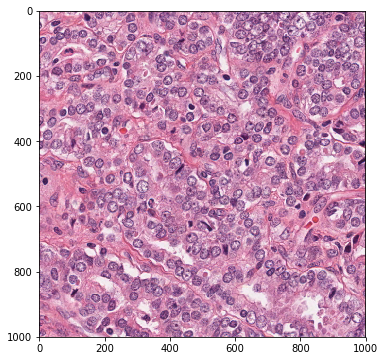

In [131]:
imid = 'TCGA-G9-6362-01Z-00-DX1'
image_path = df[df.id==imid].path.values[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.show()

Read 472 masks for image TCGA-G9-6362-01Z-00-DX1


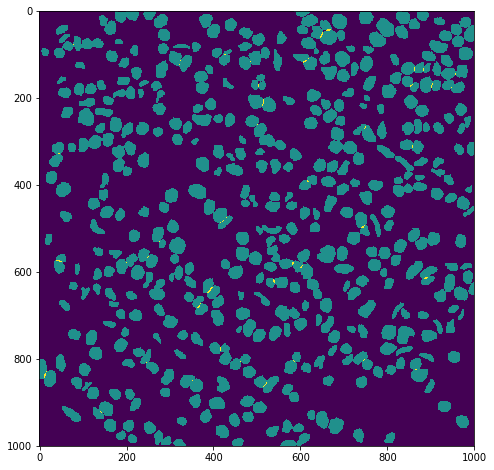

In [132]:
mask_dir = df[df.id==imid].masks.values[0]
masks = os.listdir(mask_dir)
masks[:10]

mimgs = []
i = 0

for mask in masks:
    mimg = cv2.imread(mask_dir + '/' + mask)
    mimg = cv2.cvtColor(mimg, cv2.COLOR_BGR2GRAY)
    mimg[mimg==255] = 1
    mimgs.append(mimg)
    i = i + 1

print('Read ' + str(i) + ' masks for image ' + df[df.id==imid].id.values[0] )
mimgs = np.array(mimgs)
plt.figure(figsize=(8, 8))
total_mask = np.sum(mimgs, axis=0)
plt.imshow(total_mask)
plt.show()

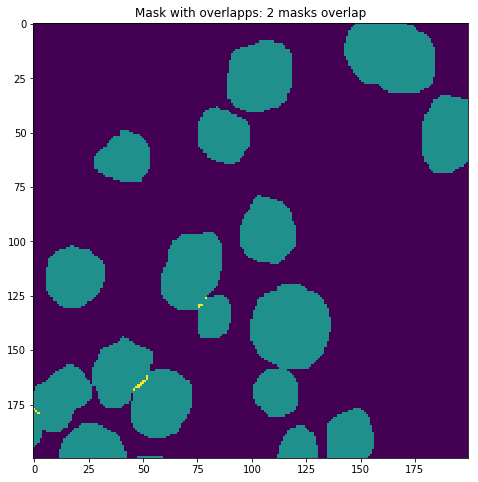

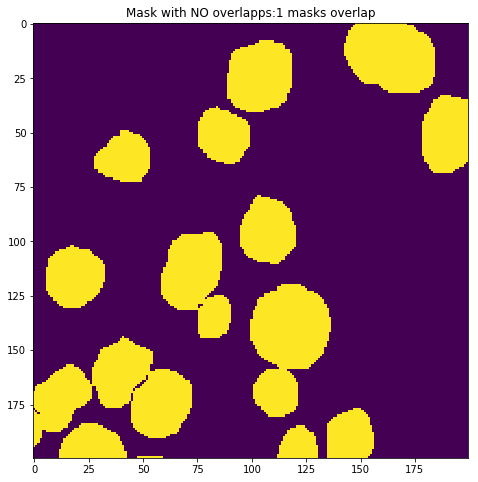

In [133]:
plt.figure(figsize=(8, 8))
total_mask = np.sum(mimgs, axis=0)
plt.title('Mask with overlapps: ' + str(np.max(total_mask)) + ' masks overlap' )
plt.imshow(total_mask[400:600, 200:400])
plt.show()
plt.figure(figsize=(8, 8))
total_mask[total_mask>1] = 0
plt.title('Mask with NO overlapps:' + str(np.max(total_mask))  + ' masks overlap')
plt.imshow(total_mask[400:600, 200:400])
plt.show()

### Resolve overlaps 

In [189]:
for i, row in df.iterrows():
    print i,
    if row['id'] != imid:
        continue

    masks_folder = row['masks']
    masks_path = [masks_folder + x for x in os.listdir(masks_folder)]
    masks = [skimage.io.imread(x).astype(np.bool) for x in masks_path]
    
    for mask_num_i, mask_i_path in enumerate(masks_path):
        for mask_num_j, mask_j_path in enumerate(masks_path):
            if mask_num_i == mask_num_j:
                continue

            mask_i = masks[mask_num_i]
            mask_j = masks[mask_num_j]
            intersection = mask_i & mask_j

            if intersection.sum() > 0:
                masks[mask_num_i][intersection] = False
                masks[mask_num_j][intersection] = False
                cv2.imwrite(masks_path[mask_num_i], masks[mask_num_i].astype(np.uint8) * 255)
                cv2.imwrite(masks_path[mask_num_j], masks[mask_num_j].astype(np.uint8) * 255)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
